## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense,Dropout 
from keras.regularizers import  L1,L2 

## creating datapoints on the image with mouse click

In [2]:
dataset=[]
 
def draw(event,x,y,flag,param):
    if event==cv2.EVENT_FLAG_LBUTTON:
        dataset.append((x,y,0))
        cv2.circle(img,(x,y),4,(0,0,255),-1)
    elif event==cv2.EVENT_FLAG_RBUTTON:
        dataset.append((x,y,1))
        cv2.circle(img,(x,y),4,(0,255,0),-1) 

In [3]:
img=np.full((400,400,3),255,np.uint8)
cv2.namedWindow("window name",cv2.WINDOW_NORMAL)
cv2.setMouseCallback("window name",draw)

while True:
    cv2.imshow("window name",img)
    if cv2.waitKey(1)&255==ord("q"):
        break 
cv2.destroyAllWindows() 

In [4]:
len(dataset) 

381

In [5]:
df=pd.DataFrame(dataset)

In [6]:
df 

,0,1,2
0,93,158,0
1,147,108,0
2,122,108,0
3,105,91,0
4,99,88,0
...,...,...,...
376,210,146,1
377,195,202,1
378,251,155,1
379,284,215,1


In [7]:
df.iloc[:,2].value_counts()

1    200
0    181
Name: 2, dtype: int64

## saving the data to a csv file

In [8]:
df.to_csv("data_points.csv",index=False)

## Import the csv file 

In [9]:
df=pd.read_csv("data_points.csv")
df.head() 

,0,1,2
0,93,158,0
1,147,108,0
2,122,108,0
3,105,91,0
4,99,88,0


## splitting into input and output features

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

## splitting the data into train and test 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardizing the input features

In [12]:
std=StandardScaler()
X_train=std.fit_transform(x_train)
X_test=std.transform(x_test) 

## creating the logical structure

In [13]:
model=Sequential()
model.add(Dense(8,activation="relu",input_dim=2)) 
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model

In [15]:
from keras.optimizers import SGD 

In [16]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.1)

Epoch 1/100
31/31 [==============================] - 1s 9ms/step - loss: 0.7643 - accuracy: 0.2345 - val_loss: 0.7269 - val_accuracy: 0.3143
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7089 - accuracy: 0.4007 - val_loss: 0.6829 - val_accuracy: 0.5143
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.6482 - val_loss: 0.6444 - val_accuracy: 0.7429
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6275 - accuracy: 0.7785 - val_loss: 0.6095 - val_accuracy: 0.7429
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.8925 - val_loss: 0.5767 - val_accuracy: 0.9714
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.9739 - val_loss: 0.5435 - val_accuracy: 0.9714
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.9902 - val_loss: 0.5079 - val_accuracy: 0.9714
Epoch 8/100
3

Epoch 59/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 60/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 61/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 62/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 63/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 64/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 65/100
31/31 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 

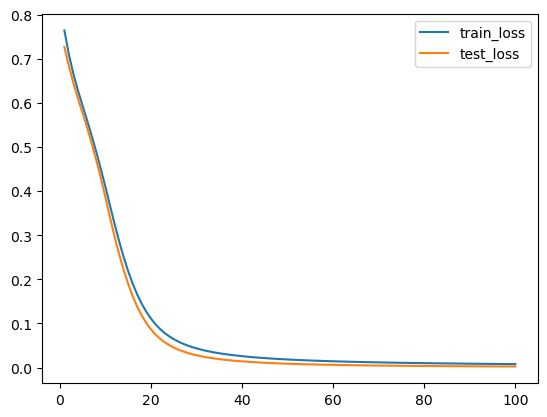

In [17]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend()  

## make predictions using the model

In [18]:
predicted=model.predict(X_test)
predicted 

2/2 [==============================] - 0s 4ms/step


array([[9.9970138e-01],
       [9.9414080e-01],
       [9.9989146e-01],
       [2.7319605e-03],
       [9.9771285e-01],
       [3.4563683e-02],
       [6.7912764e-04],
       [3.8774495e-03],
       [9.9953789e-01],
       [5.3173453e-03],
       [9.6214324e-01],
       [8.2961870e-03],
       [9.9787098e-01],
       [9.9939072e-01],
       [1.0977978e-02],
       [9.9974716e-01],
       [1.0090649e-02],
       [9.9770856e-01],
       [7.6775891e-03],
       [2.5848905e-03],
       [2.4586413e-03],
       [2.5230173e-03],
       [3.5411301e-03],
       [9.9976623e-01],
       [9.9786490e-01],
       [4.0883417e-03],
       [9.9967283e-01],
       [1.0245558e-01],
       [1.0126319e-03],
       [9.9924803e-01],
       [6.2947180e-03],
       [7.9028336e-03],
       [3.6413033e-04],
       [9.9969935e-01],
       [9.9965173e-01],
       [9.9677396e-01],
       [1.6186252e-03],
       [9.9971610e-01],
       [1.3761004e-02]], dtype=float32)

In [19]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0]])

## evaluating the model

1.0


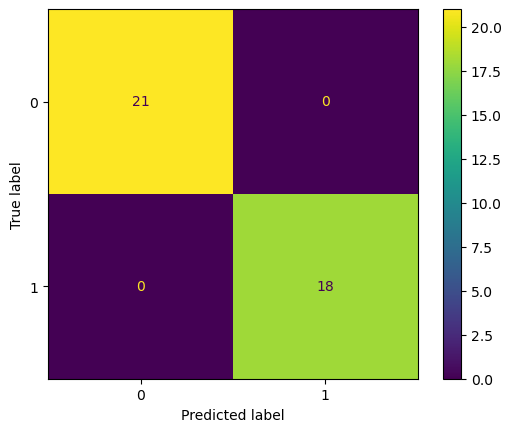

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 
 

## plotting the decision surface

In [21]:
from mlxtend.plotting  import plot_decision_regions 

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

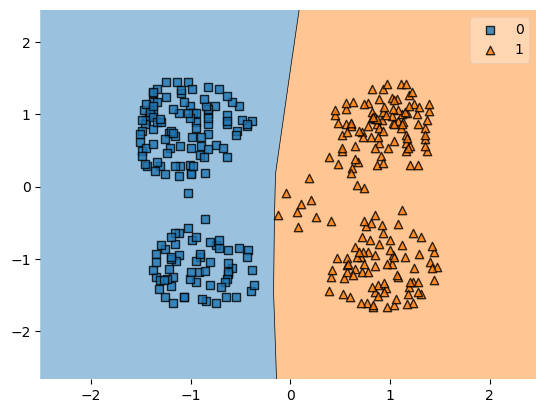

In [22]:
plot_decision_regions(X_train,y_train.values,clf=model) 

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

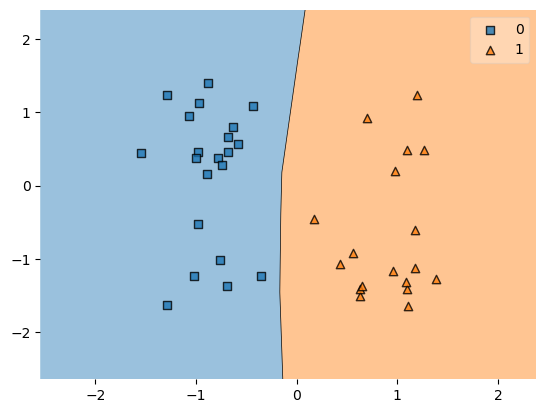

In [23]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model) 